In [52]:
import torch
import torchvision.transforms as transforms
import numpy

from PIL import Image
import matplotlib.pyplot as plt

from Model import SiameseViT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Устройство: {device}")

# Путь к модели
model_path = r'/home/Doctor_S/PYTHON_PROJECTS/STUDY/Signature/models/best_model.pth'

Устройство: cuda


In [ ]:
def verify_signature(model, img1_path, img2_path, transform, device, show_result = True):
    model.eval()
    
    # Загрузка изображений
    img1 = Image.open(img1_path).convert('L')
    img2 = Image.open(img2_path).convert('L')
    
    # Применение преобразований
    img1_tensor = transform(img1).unsqueeze(0).to(device)
    img2_tensor = transform(img2).unsqueeze(0).to(device)
    
    # Предсказание
    with torch.no_grad():
        output = model(img1_tensor, img2_tensor)
    
    confidence = output.item()
    result = True if confidence > 0.5 else False
    
    if show_result:
        # Визуализация
        result_txt = "Оригинал" if result else "Подделка"
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        ax1.imshow(img1, cmap='gray')
        ax1.set_title(f"Оригинальная подпись")
        ax1.axis('off')
        
        ax2.imshow(img2, cmap='gray')
        color = 'green' if result else 'red'
        ax2.set_title(f"Результат: {result_txt}\nПроцент оригинальности: {confidence*100:.2f}%", color=color, fontsize=14)
        ax2.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    return result, confidence

def signature_recognition(img_orig, img_test, model_path):
    try:

        img_size = (128, 256)
        model = SiameseViT(feature_dim = 1024, embed_dim = 256, img_size = img_size).to(device)

        model.load_state_dict(torch.load(model_path)['model_state_dict'])

        transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
        ])

        result, confidence= verify_signature(
            model, 
            img_orig, 
            img_test, 
            transform,
            device,
            show_result= True
        )
        return result, confidence
    
    except Exception as e:
        print(f"Ошибка при демонстрации: {str(e)}")
        return None, None

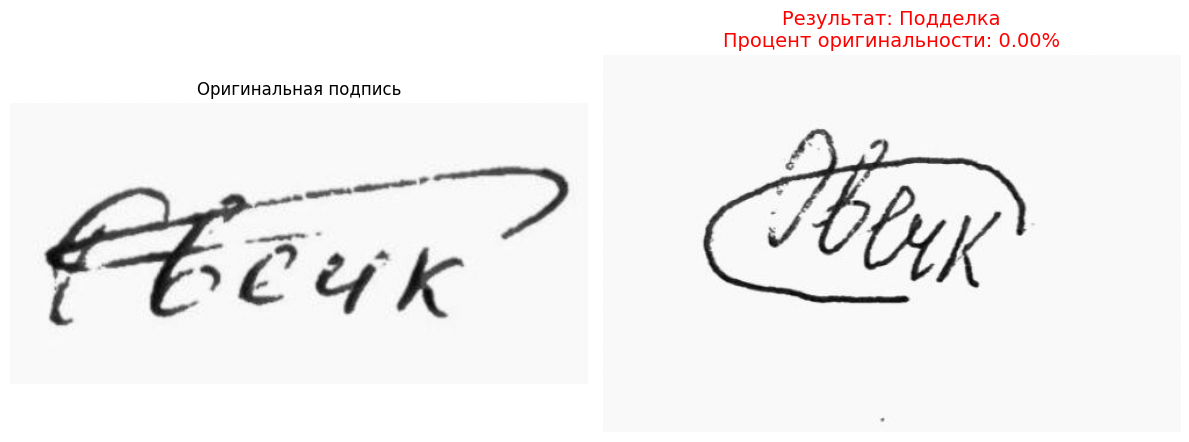

Результат проверки: False
Процент оригинальности: 0.0000


In [54]:
img_orig = r"/home/Doctor_S/PYTHON_PROJECTS/STUDY/Signature/TEST/original/3.jpg"
img_test = r"/home/Doctor_S/PYTHON_PROJECTS/STUDY/Signature/TEST/forged/for1.jpg"

result, confidence = signature_recognition(img_orig, img_test, model_path)
print(f"Результат проверки: {result}")
print(f"Процент оригинальности: {confidence:.4f}")

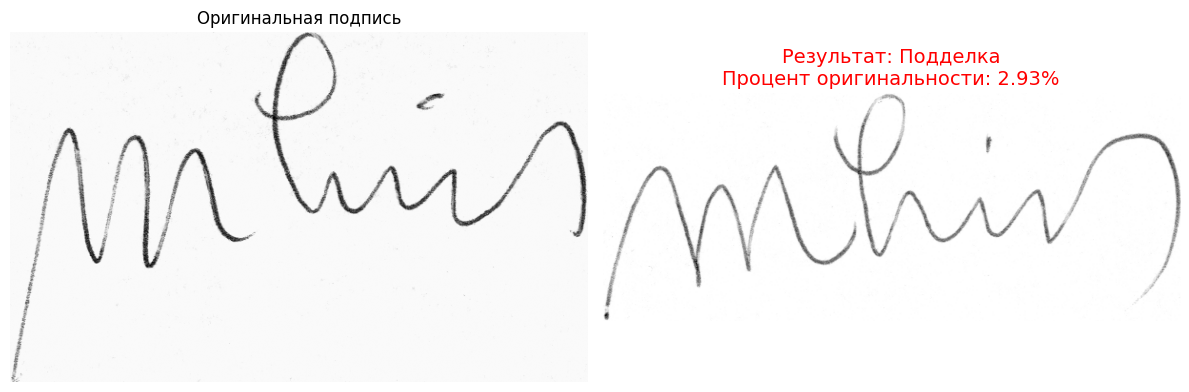

Результат проверки: False
Процент оригинальности: 0.0293


In [55]:
img_orig = r"/home/Doctor_S/PYTHON_PROJECTS/STUDY/Signature/Data/full/019/019_02.png"
img_test = r"/home/Doctor_S/PYTHON_PROJECTS/STUDY/Signature/Data/full/019_forg/019_forg_00.png"

result, confidence = signature_recognition(img_orig, img_test, model_path)
print(f"Результат проверки: {result}")
print(f"Процент оригинальности: {confidence:.4f}")

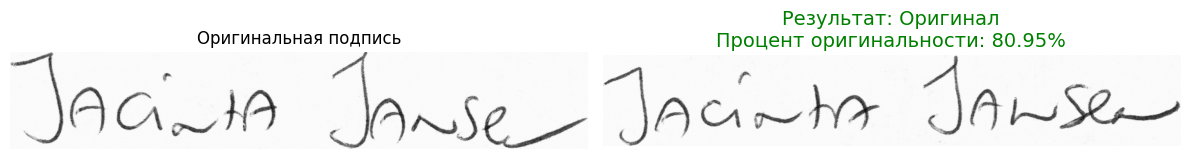

Результат проверки: True
Процент оригинальности: 0.8095


In [56]:
img_orig = r"/home/Doctor_S/PYTHON_PROJECTS/STUDY/Signature/Data/full/017/017_01.png"
img_test = r"/home/Doctor_S/PYTHON_PROJECTS/STUDY/Signature/Data/full/017/017_07.png"

result, confidence = signature_recognition(img_orig, img_test, model_path)
print(f"Результат проверки: {result}")
print(f"Процент оригинальности: {confidence:.4f}")